In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
data=pd.read_csv("movie.csv")

In [15]:
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())
print(data.shape)
print(data.columns)


                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
                                                    text  label
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtyp

In [17]:
data.duplicated().sum()  #yes there are duplicate entries.

np.int64(277)

In [30]:
datanew =data.drop_duplicates()  #we dropeed all duplicate columns.

In [31]:
datanew.isnull().sum()     #we get no missing entry.

,0
text,0
label,0


In [32]:
datanew['label'].unique()    #no inconsistent entry

array([0, 1])

In [35]:
datanew['label'].value_counts() # data is balanced.



,count
label,
1,19908
0,19815


<Axes: xlabel='label', ylabel='count'>

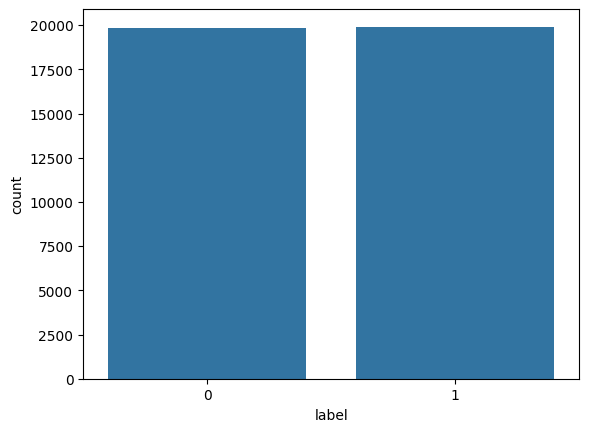

In [38]:
sns.countplot(x='label', data=datanew)

In [42]:
datanew['review_length'] = datanew['text'].apply(len)

<ipython-input-42-e4e158dbbde5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['review_length'] = datanew['text'].apply(len)


In [50]:
datanew['cleaned'] = datanew['text'].str.lower()


<ipython-input-50-d8ffdfb908fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cleaned'] = datanew['text'].str.lower()


In [51]:
import re
datanew['cleaned'] = datanew['cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


<ipython-input-51-be2c21374358>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cleaned'] = datanew['cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


In [52]:
import string
datanew['cleaned'] = datanew['cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


<ipython-input-52-b992b5cf160d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cleaned'] = datanew['cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [66]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

datanew['cleaned'] = datanew['cleaned'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

datanew['tokens'] = datanew['cleaned'].apply(word_tokenize)

datanew['stemmed'] = datanew['tokens'].apply(
    lambda tokens: [stemmer.stem(token) for token in tokens]
)
datanew['lemmatized'] = datanew['tokens'].apply(
    lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]
)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-66-21e5b02e35a7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['cleaned'] = datanew['cleaned'].apply(
<ipython-input-66-21e5b02e35a7>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['tokens'] = datanew['cleaned'].apply(word_tokenize)
<ipython-input-66-21e5b02e35a7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [67]:
from sklearn.model_selection import train_test_split

datanew['final_text'] = datanew['lemmatized'].apply(lambda x: ' '.join(x))

X = datanew['final_text']
y = datanew['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<ipython-input-67-8ad50ce35eb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew['final_text'] = datanew['lemmatized'].apply(lambda x: ' '.join(x))


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)




🔍 Evaluation for: Logistic Regression
✅ Accuracy: 0.8823
✅ F1 Score: 0.8830
✅ ROC-AUC: 0.9511957037375572


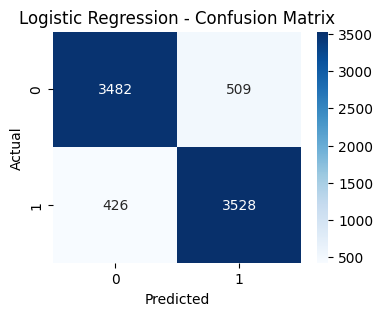


🔍 Evaluation for: Bernoulli Naive Bayes
✅ Accuracy: 0.8495
✅ F1 Score: 0.8495
✅ ROC-AUC: 0.9197698171923753


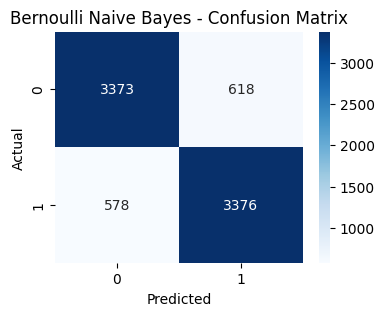


🔍 Evaluation for: SVM (Linear)
✅ Accuracy: 0.8731
✅ F1 Score: 0.8735
✅ ROC-AUC: N/A


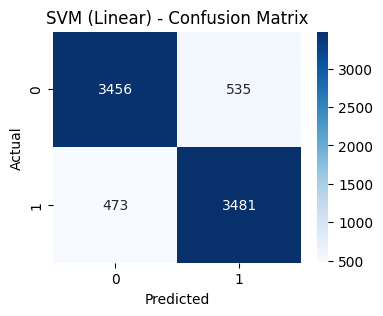


🔍 Evaluation for: Random Forest
✅ Accuracy: 0.8381
✅ F1 Score: 0.8350
✅ ROC-AUC: 0.9215468618250446


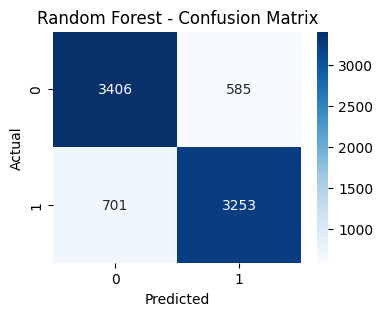

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7926 - loss: 0.4350 - val_accuracy: 0.8911 - val_loss: 0.2687
Epoch 2/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9133 - loss: 0.2152 - val_accuracy: 0.8823 - val_loss: 0.2759
Epoch 3/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9339 - loss: 0.1750 - val_accuracy: 0.8744 - val_loss: 0.2907
Epoch 4/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9646 - loss: 0.1116 - val_accuracy: 0.8710 - val_loss: 0.3602
Epoch 5/5
447/447 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9889 - loss: 0.0408 - val_accuracy: 0.8735 - val_loss: 0.4340
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🔍 Evaluation for: Neural Network
✅ Accuracy: 0.8671
✅ F1 Score: 0.8679
✅ ROC-AUC: 0.9382763025101875


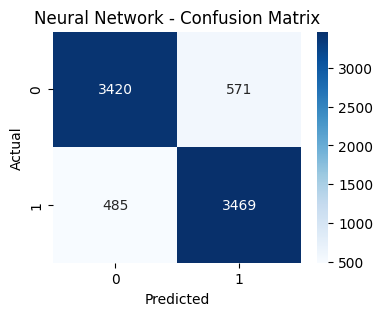

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def evaluate_model(name, y_true, y_pred, y_proba=None):
    print(f"\n🔍 Evaluation for: {name}")
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_proba) if y_proba is not None else "N/A"

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print(f"✅ ROC-AUC: {roc}")

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
logreg_pred = logreg.predict(X_test_tfidf)
logreg_proba = logreg.predict_proba(X_test_tfidf)[:, 1]
evaluate_model("Logistic Regression", y_test, logreg_pred, logreg_proba)

bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)
bnb_pred = bnb.predict(X_test_tfidf)
bnb_proba = bnb.predict_proba(X_test_tfidf)[:, 1]
evaluate_model("Bernoulli Naive Bayes", y_test, bnb_pred, bnb_proba)

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
svm_pred = svm.predict(X_test_tfidf)
evaluate_model("SVM (Linear)", y_test, svm_pred)  # No ROC-AUC

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict(X_test_tfidf)
rf_proba = rf.predict_proba(X_test_tfidf)[:, 1]
evaluate_model("Random Forest", y_test, rf_pred, rf_proba)

X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

nn = Sequential()
nn.add(Dense(128, activation='relu', input_shape=(X_train_dense.shape[1],)))
nn.add(Dense(64, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn.fit(X_train_dense, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

nn_proba = nn.predict(X_test_dense).flatten()
nn_pred = (nn_proba > 0.5).astype("int32")
evaluate_model("Neural Network", y_test, nn_pred, nn_proba)
